Name Surname: Emil Huseynov

Student No: 150210906

---

Libraries to be used

---



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

# Build your own code-base (30 points)

Implement the methods provided and compare your implementation with Sklearn library

---

K-Nearest Neighbour (5 points)

In [2]:
class KNN:
    def __init__(self, train_data, train_label, k=3):
        self.k = k
        self.train_data = train_data
        self.train_label = train_label

    def predict(self, test_data):
        predictions = []

        for test_point in test_data:
            # Calculate the Euclidean distance between the test point and each training data point
            distances = []
            for i in range(len(self.train_data)):
                distance = np.sqrt(np.sum((self.train_data[i] - test_point) ** 2))
                distances.append((distance, self.train_label[i]))

            # Sort distances and get the k nearest labels
            distances.sort(key=lambda x: x[0])
            k_nearest_labels = [label for _, label in distances[:self.k]]

            # Manually count occurrences to find the most common label
            label_counts = {}
            for label in k_nearest_labels:
                if label in label_counts:
                    label_counts[label] += 1
                else:
                    label_counts[label] = 1

            # Determine the label with the highest count
            most_common_label = max(label_counts, key=label_counts.get)
            predictions.append(most_common_label)

        return predictions



| Feature               | My KNN Implementation            | Sklearn KNeighborsClassifier           |
|-----------------------|--------------------------------------|----------------------------------------|
| **Distance Metric**   | Only Euclidean                      | Multiple (Euclidean, Manhattan, etc.)  |
| **Voting**            | Majority voting only                | Supports weighted voting               |
| **Ease of Use**       | Manual setup, basic Python          | Easy-to-use API with `.fit()` & `.predict()` |
| **Flexibility**       | Limited options, no customization   | Customizable (metrics, weights)        |
| **Performance**       | Slower, unoptimized                 | Fast, optimized with data structures like KDTree |
| **Error Handling**    | Minimal error checks                | Robust input validation                |

**Gaussian** Naive Bayes (5 points)

In [18]:
class GNB:
    def __init__(self, train_data, train_label):
        self.train_data = np.array(train_data)
        self.train_label = np.array(train_label)
        self.classes = np.unique(self.train_label)
        self.means = {}
        self.variances = {}
        self.priors = {}

    def gaussian_probability(self, x, mean, variance):
        # Handle zero variance
        variance = np.where(variance == 0, 1e-6, variance)
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def fit(self):
        # Calculate mean, variance, and prior for each class
        for c in self.classes:
            # Filter data by class
            class_data = self.train_data[self.train_label == c]
            # Calculate mean and variance for each feature in the class
            self.means[c] = np.mean(class_data, axis=0)
            self.variances[c] = np.var(class_data, axis=0)
            # Handle zero variance
            self.variances[c][self.variances[c] == 0] = 1e-6
            # Calculate prior probability for the class
            self.priors[c] = class_data.shape[0] / self.train_data.shape[0]

    def predict(self, test_data):
        test_data = np.array(test_data)
        predictions = []

        for x in test_data:
            class_probabilities = {}
            for c in self.classes:
                # Start with the log prior probability for the class
                class_prob = np.log(self.priors[c])

                # Sum the log of Gaussian probabilities of each feature
                mean = self.means[c]
                variance = self.variances[c]
                # Handle zero variance
                variance = np.where(variance == 0, 1e-6, variance)
                # Calculate log probability
                log_prob = -0.5 * np.sum(np.log(2 * np.pi * variance))
                log_prob -= 0.5 * np.sum(((x - mean) ** 2) / variance)
                class_prob += log_prob

                class_probabilities[c] = class_prob

            # Choose the class with the highest probability
            predictions.append(max(class_probabilities, key=class_probabilities.get))

        return np.array(predictions)



| Feature               | My GNB Implementation           | Sklearn GaussianNB                     |
|-----------------------|-------------------------------------|----------------------------------------|
| **Distribution**      | Gaussian (Normal) only             | Gaussian (Normal) only                 |
| **Parameter Calculation** | Manual mean, variance, and prior probability calculation | Automatic mean, variance, and prior calculation |
| **Ease of Use**       | Requires manual setup              | Simple API with `.fit()` & `.predict()` |
| **Flexibility**       | Limited, supports only Gaussian distribution | Can integrate with Sklearn pipeline and additional options |
| **Performance**       | Slower on larger datasets, unoptimized | Optimized with C libraries for faster processing |
| **Error Handling**    | Basic, minimal error handling      | Robust input validation and error handling |

Principal Component Analysis (5 points)

In [19]:
class PCA:
    def __init__(self, data, n_components):
        self.data = data
        self.n_components = n_components
        self.components = None  # To store principal components
        self.mean = None        # To store the mean of the data

    def fit(self):
        # Step 1: Center the data by subtracting the mean
        self.mean = np.mean(self.data, axis=0)
        centered_data = self.data - self.mean

        # Step 2: Compute the covariance matrix
        covariance_matrix = np.cov(centered_data, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort eigenvectors by eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Select the top n_components eigenvectors
        self.components = sorted_eigenvectors[:, :self.n_components]

    def transform(self, x):
        # Center the input data
        centered_x = x - self.mean
        # Project the data onto principal components
        return np.dot(centered_x, self.components)


| Feature               | Custom PCA Implementation               | Sklearn PCA                                |
|-----------------------|-----------------------------------------|--------------------------------------------|
| **Data Centering**    | Manual mean calculation                 | Automatic mean centering                   |
| **Covariance Matrix** | Manual calculation with `np.cov`        | Optimized calculations                     |
| **Eigen Decomposition** | Manual, uses `np.linalg.eigh`         | Optimized, supports SVD for speed          |
| **Ease of Use**       | Requires manual setup                   | Simple API with `.fit()` & `.transform()`  |
| **Flexibility**       | Basic, limited to covariance eigenvalues | Supports additional parameters like `whiten` and `SVD` |
| **Performance**       | Slower, especially on large datasets    | Highly optimized with C libraries          |
| **Error Handling**    | Basic, minimal error handling           | Robust input validation and error handling |

Metrics (2+3 points)



In [20]:
def rmse(y_true, y_pred):
    # Calculate the root mean square error
    mse = np.mean((y_true - y_pred) ** 2)
    return np.sqrt(mse)

def accuracyNf1_score(y_true, y_pred):
    # Calculate accuracy
    accuracy = np.sum(y_true == y_pred) / len(y_true)

    # Calculate F1 Score
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, f1_score

| Metric             | Custom Implementation                    | Sklearn Metrics                    |
|--------------------|------------------------------------------|------------------------------------|
| **RMSE**           | Manual calculation with `np.sqrt()`      | `mean_squared_error(squared=False)` |
| **Accuracy**       | Simple count of correct predictions      | `accuracy_score`                   |
| **F1 Score**       | Manual calculation of precision and recall | `f1_score`, with various averaging options |
| **Ease of Use**    | Basic, requires manual setup             | Single function calls with various parameters |
| **Performance**    | Basic, slower for large datasets         | Optimized, fast for large datasets |
| **Error Handling** | Minimal, manual exception handling       | Robust input validation            |

Visualization Tools (5 points)

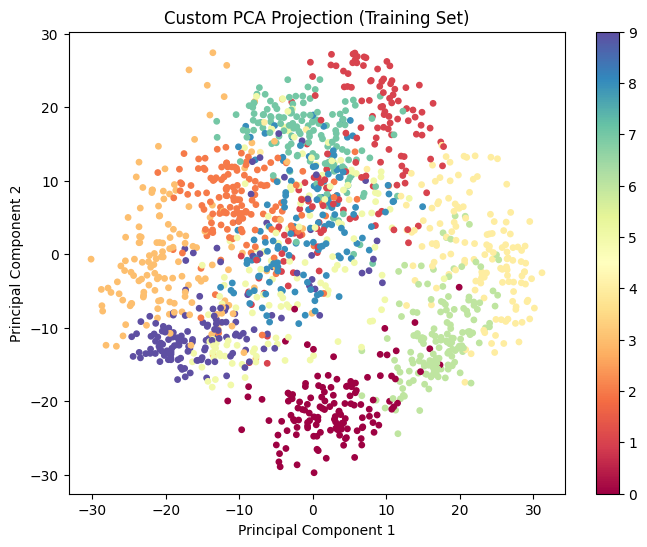

Custom KNN Classifier Accuracy: 0.5694444444444444
Custom KNN Classifier F1 Score: 0
Custom KNN Classifier RMSE: 2.8289181285038594


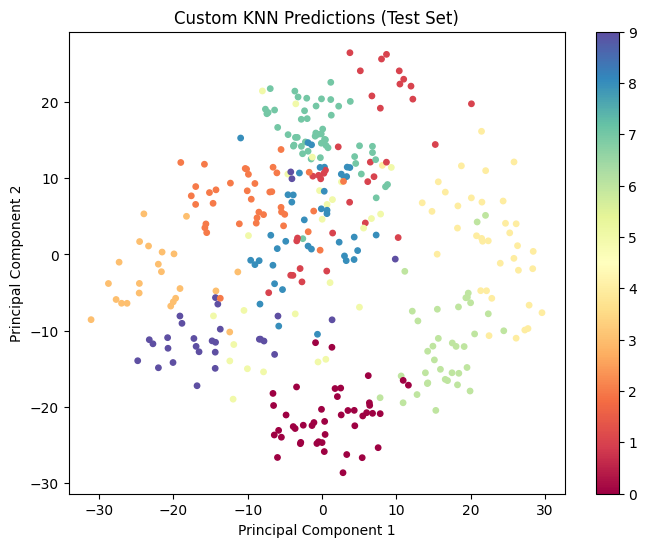

Custom GNB Classifier Accuracy: 0.8888888888888888
Custom GNB Classifier F1 Score: 1.0
Custom GNB Classifier RMSE: 1.5257056655127745


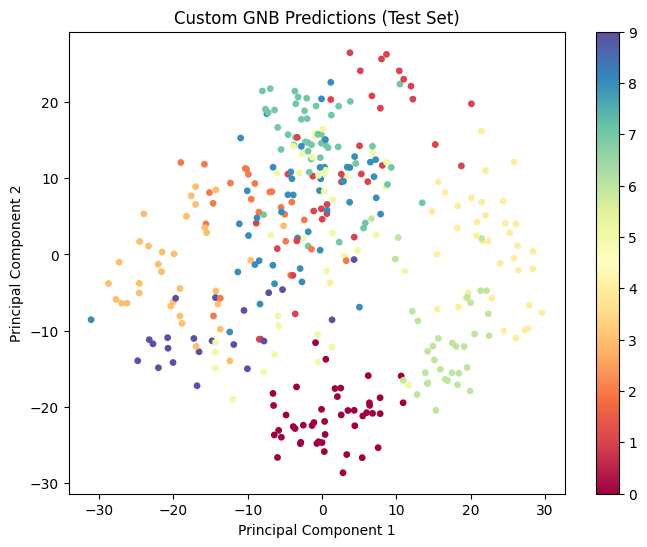

In [21]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply PCA
pca = PCA(X_train, n_components=2)
pca.fit()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Spectral', s=15)
plt.colorbar(scatter)
plt.title('Custom PCA Projection (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# KNN Classifier
knn = KNN(X_train_pca, y_train, k=3)
y_pred_knn = knn.predict(X_test_pca)

# Evaluate KNN
accuracy_knn, f1_knn = accuracyNf1_score(y_test, y_pred_knn)
print(f"Custom KNN Classifier Accuracy: {accuracy_knn}")
print(f"Custom KNN Classifier F1 Score: {f1_knn}")
print(f"Custom KNN Classifier RMSE: {rmse(y_test, y_pred_knn)}")

# Visualize KNN predictions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_knn, cmap='Spectral', s=15)
plt.colorbar(scatter)
plt.title('Custom KNN Predictions (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Gaussian Naive Bayes Classifier
gnb = GNB(X_train, y_train)
gnb.fit()
y_pred_gnb = gnb.predict(X_test)

# Evaluate GNB
accuracy_gnb, f1_gnb = accuracyNf1_score(y_test, y_pred_gnb)
print(f"Custom GNB Classifier Accuracy: {accuracy_gnb}")
print(f"Custom GNB Classifier F1 Score: {f1_gnb}")
print(f"Custom GNB Classifier RMSE: {rmse(y_test, y_pred_gnb)}")

# Visualize GNB predictions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_gnb, cmap='Spectral', s=15)
plt.colorbar(scatter)
plt.title('Custom GNB Predictions (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


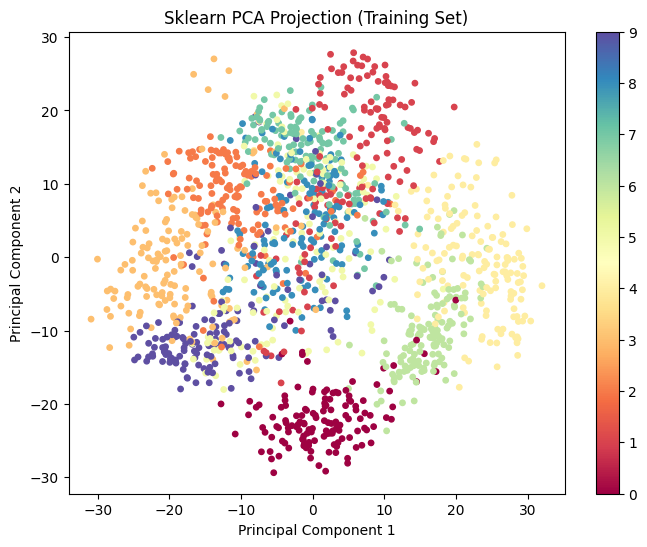

Sklearn KNN Classifier Accuracy: 0.6111111111111112
Sklearn KNN Classifier F1 Score: 0.6012170657009752
Sklearn KNN Classifier RMSE: 2.6188419832691956


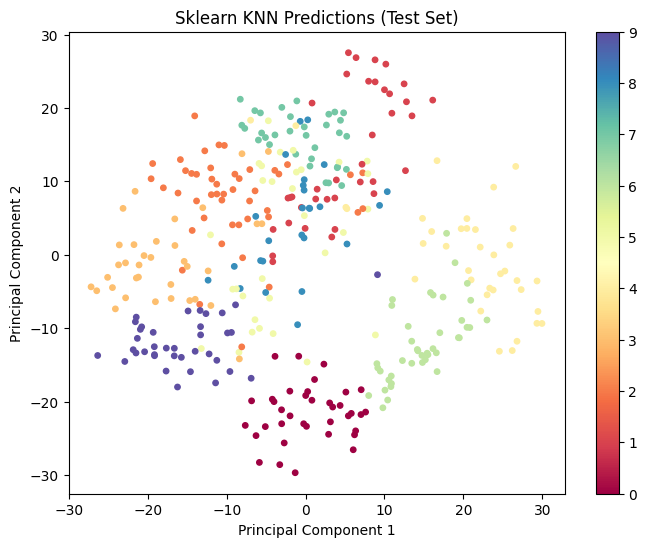

Sklearn GNB Classifier Accuracy: 0.7888888888888889
Sklearn GNB Classifier F1 Score: 0.7838417444019993
Sklearn GNB Classifier RMSE: 2.308799591899556


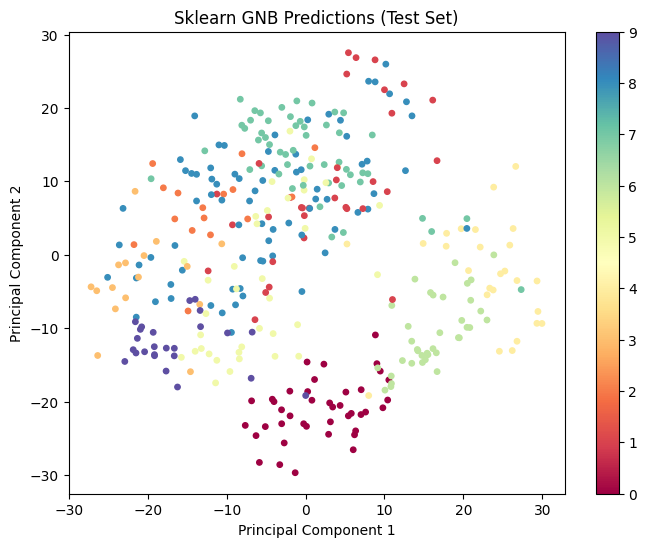

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Spectral', s=15)
plt.colorbar(scatter)
plt.title('Sklearn PCA Projection (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

# Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"Sklearn KNN Classifier Accuracy: {accuracy_knn}")
print(f"Sklearn KNN Classifier F1 Score: {f1_knn}")
print(f"Sklearn KNN Classifier RMSE: {rmse_knn}")

# Visualize KNN predictions
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_knn, cmap='Spectral', s=15)
plt.colorbar(scatter)
plt.title('Sklearn KNN Predictions (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Evaluate GNB
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, average='macro')
rmse_gnb = np.sqrt(mean_squared_error(y_test, y_pred_gnb))
print(f"Sklearn GNB Classifier Accuracy: {accuracy_gnb}")
print(f"Sklearn GNB Classifier F1 Score: {f1_gnb}")
print(f"Sklearn GNB Classifier RMSE: {rmse_gnb}")

# Visualize GNB predictions
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_gnb, cmap='Spectral', s=15)
plt.colorbar(scatter)
plt.title('Sklearn GNB Predictions (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Experiments (45 points)

Use Sklearn classes

---

Dataset preparation

In [23]:
# Load dataset and split to train and test set
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=454)

# Calculate the frequency of each class in the training set
unique_classes_test, class_counts_test = np.unique(y_test, return_counts=True)
unique_classes_train, class_counts_train = np.unique(y_train, return_counts=True)

for cls_train, count_train, cls_test, count_test in zip(unique_classes_train, class_counts_train, unique_classes_test, class_counts_test):
  print(f"Class {cls_train}: {count_train} train  {count_test} test {count_train/count_test} ratio")

Class 0: 144 train  34 test 4.235294117647059 ratio
Class 1: 137 train  45 test 3.0444444444444443 ratio
Class 2: 150 train  27 test 5.555555555555555 ratio
Class 3: 145 train  38 test 3.8157894736842106 ratio
Class 4: 145 train  36 test 4.027777777777778 ratio
Class 5: 144 train  38 test 3.789473684210526 ratio
Class 6: 146 train  35 test 4.171428571428572 ratio
Class 7: 142 train  37 test 3.8378378378378377 ratio
Class 8: 143 train  31 test 4.612903225806452 ratio
Class 9: 141 train  39 test 3.6153846153846154 ratio


Apply classification methods using the dataset directly (10 points)
(paramtre denemeleri tarzı şeyler)


Custom KNN Classifier Performance:
k = 1 --> Accuracy: 0.9694, F1 Score: 0.0000, RMSE: 0.9789
k = 3 --> Accuracy: 0.9750, F1 Score: 0.0000, RMSE: 0.8498
k = 5 --> Accuracy: 0.9694, F1 Score: 0.0000, RMSE: 0.9501
k = 7 --> Accuracy: 0.9694, F1 Score: 0.0000, RMSE: 0.9560
k = 9 --> Accuracy: 0.9722, F1 Score: 0.0000, RMSE: 0.9324


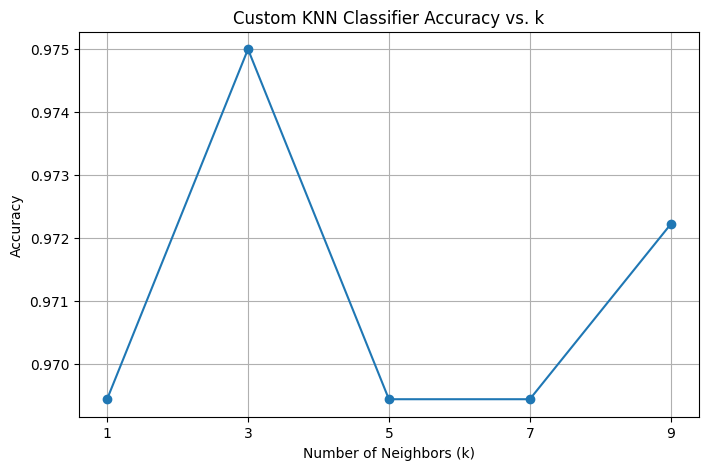


Custom GNB Classifier Performance:
Accuracy: 0.8778, F1 Score: 1.0000, RMSE: 1.6583


In [24]:
# Parameter tuning for KNN
k_values = [1, 3, 5, 7, 9]
knn_accuracies = []
knn_f1_scores = []

print("\nCustom KNN Classifier Performance:")
for k in k_values:
    knn = KNN(X_train, y_train, k=k)
    y_pred_knn = knn.predict(X_test)
    accuracy_knn, f1_knn = accuracyNf1_score(y_test, y_pred_knn)
    knn_accuracies.append(accuracy_knn)
    knn_f1_scores.append(f1_knn)
    print(f"k = {k} --> Accuracy: {accuracy_knn:.4f}, F1 Score: {f1_knn:.4f}, RMSE: {rmse(y_test, y_pred_knn):.4f}")

# Visualize KNN accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('Custom KNN Classifier Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Apply Gaussian Naive Bayes
gnb = GNB(X_train, y_train)
gnb.fit()
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb, f1_gnb = accuracyNf1_score(y_test, y_pred_gnb)
print("\nCustom GNB Classifier Performance:")
print(f"Accuracy: {accuracy_gnb:.4f}, F1 Score: {f1_gnb:.4f}, RMSE: {rmse(y_test, y_pred_gnb):.4f}")


Apply PCA and find optimal #components with the best recontruction (RMSE) as the objective (10 points)

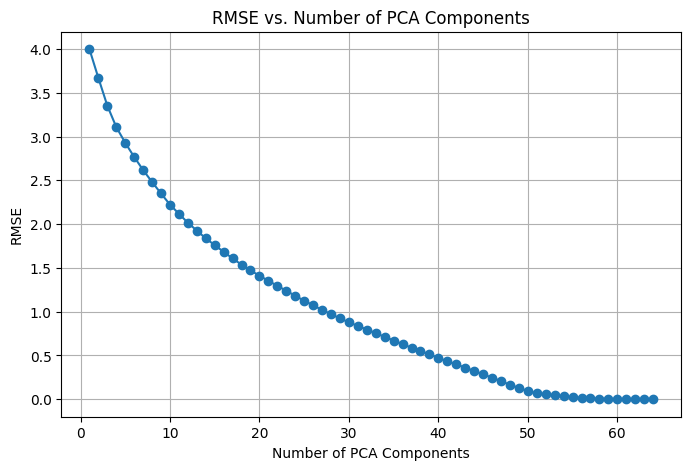

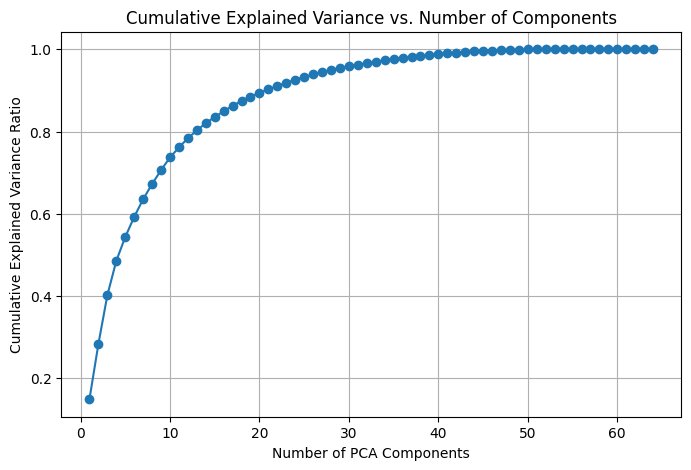

Number of components explaining at least 95% variance: 29


In [25]:
# List to store RMSE values
rmse_list = []
n_components_list = range(1, 65)  # From 1 to 64 components (digits dataset has 64 features)

for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_train_reconstructed = pca.inverse_transform(X_train_pca)
    # Compute RMSE between original and reconstructed data
    mse = mean_squared_error(X_train, X_train_reconstructed)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

# Plot RMSE vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(n_components_list, rmse_list, marker='o')
plt.title('RMSE vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Find the number of components that explain at least 95% variance
pca_full = PCA(n_components=64)
pca_full.fit(X_train)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 65), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Find number of components that explain at least 95% variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components explaining at least 95% variance: {n_components_95}')

Apply PCA class-wise and merge the transformed features (10 points)

In [26]:
n_components_per_class = 3  # Number of components per class
class_pca_models = {}

# Fit PCA for each class separately
for cls in np.unique(y_train):
    # Get data for this class
    X_train_cls = X_train[y_train == cls]
    # Fit PCA
    pca_cls = PCA(n_components=n_components_per_class)
    pca_cls.fit(X_train_cls)
    # Store the PCA model for the class
    class_pca_models[cls] = pca_cls

# Transform X_train using class-wise PCA and merge features
X_train_class_pca = []
for x in X_train:
    x_transformed = []
    for cls in np.unique(y_train):
        pca_cls = class_pca_models[cls]
        x_proj = pca_cls.transform(x.reshape(1, -1))
        x_transformed.extend(x_proj.flatten())
    X_train_class_pca.append(x_transformed)
X_train_class_pca = np.array(X_train_class_pca)
print(f'Shape of class-wise PCA transformed X_train: {X_train_class_pca.shape}')

# Transform X_test using class-wise PCA and merge features
X_test_class_pca = []
for x in X_test:
    x_transformed = []
    for cls in np.unique(y_train):
        pca_cls = class_pca_models[cls]
        x_proj = pca_cls.transform(x.reshape(1, -1))
        x_transformed.extend(x_proj.flatten())
    X_test_class_pca.append(x_transformed)
X_test_class_pca = np.array(X_test_class_pca)
print(f'Shape of class-wise PCA transformed X_test: {X_test_class_pca.shape}')


Shape of class-wise PCA transformed X_train: (1437, 30)
Shape of class-wise PCA transformed X_test: (360, 30)


Apply classification methods on the transformed features (PCA outputs) both nomral and class-wise (15 points)
(normal PCA dimension 30, class-wise PCA dimension 3x10)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Use normal PCA with dimension 30
n_components_normal_pca = 30
pca_normal = PCA(n_components=n_components_normal_pca)
X_train_pca = pca_normal.fit_transform(X_train)
X_test_pca = pca_normal.transform(X_test)

# Classification on normal PCA-transformed features

# KNN Classifier on normal PCA features
knn_normal = KNeighborsClassifier(n_neighbors=3)
knn_normal.fit(X_train_pca, y_train)
y_pred_knn_normal = knn_normal.predict(X_test_pca)
accuracy_knn_normal = accuracy_score(y_test, y_pred_knn_normal)
f1_knn_normal = f1_score(y_test, y_pred_knn_normal, average='macro')
rmse_knn_normal = np.sqrt(mean_squared_error(y_test, y_pred_knn_normal))
print("\nKNN on normal PCA-transformed features:")
print(f"Accuracy: {accuracy_knn_normal:.4f}, F1 Score: {f1_knn_normal:.4f}, RMSE: {rmse_knn_normal:.4f}")

# Gaussian Naive Bayes on normal PCA features
gnb_normal = GaussianNB()
gnb_normal.fit(X_train_pca, y_train)
y_pred_gnb_normal = gnb_normal.predict(X_test_pca)
accuracy_gnb_normal = accuracy_score(y_test, y_pred_gnb_normal)
f1_gnb_normal = f1_score(y_test, y_pred_gnb_normal, average='macro')
rmse_gnb_normal = np.sqrt(mean_squared_error(y_test, y_pred_gnb_normal))
print("\nGNB on normal PCA-transformed features:")
print(f"Accuracy: {accuracy_gnb_normal:.4f}, F1 Score: {f1_gnb_normal:.4f}, RMSE: {rmse_gnb_normal:.4f}")

# Classification on class-wise PCA-transformed features

# KNN Classifier on class-wise PCA features
knn_classwise = KNeighborsClassifier(n_neighbors=3)
knn_classwise.fit(X_train_class_pca, y_train)
y_pred_knn_classwise = knn_classwise.predict(X_test_class_pca)
accuracy_knn_classwise = accuracy_score(y_test, y_pred_knn_classwise)
f1_knn_classwise = f1_score(y_test, y_pred_knn_classwise, average='macro')
rmse_knn_classwise = np.sqrt(mean_squared_error(y_test, y_pred_knn_classwise))
print("\nKNN on class-wise PCA-transformed features:")
print(f"Accuracy: {accuracy_knn_classwise:.4f}, F1 Score: {f1_knn_classwise:.4f}, RMSE: {rmse_knn_classwise:.4f}")

# Gaussian Naive Bayes on class-wise PCA features
gnb_classwise = GaussianNB()
gnb_classwise.fit(X_train_class_pca, y_train)
y_pred_gnb_classwise = gnb_classwise.predict(X_test_class_pca)
accuracy_gnb_classwise = accuracy_score(y_test, y_pred_gnb_classwise)
f1_gnb_classwise = f1_score(y_test, y_pred_gnb_classwise, average='macro')
rmse_gnb_classwise = np.sqrt(mean_squared_error(y_test, y_pred_gnb_classwise))
print("\nGNB on class-wise PCA-transformed features:")
print(f"Accuracy: {accuracy_gnb_classwise:.4f}, F1 Score: {f1_gnb_classwise:.4f}, RMSE: {rmse_gnb_classwise:.4f}")



KNN on normal PCA-transformed features:
Accuracy: 0.9778, F1 Score: 0.9789, RMSE: 0.8482

GNB on normal PCA-transformed features:
Accuracy: 0.9472, F1 Score: 0.9478, RMSE: 1.2293

KNN on class-wise PCA-transformed features:
Accuracy: 0.9583, F1 Score: 0.9593, RMSE: 1.1242

GNB on class-wise PCA-transformed features:
Accuracy: 0.8861, F1 Score: 0.8861, RMSE: 1.5393
